# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np


n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = X_train[0].shape
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =",n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [18]:
from pandas.io.parsers import read_csv
signNames = read_csv("signnames.csv").values[:, 1]

In [19]:
signCounts = np.bincount(y_train)
signClasses = np.unique(y_train)

In [ ]:
import matplotlib.pyplot as plt


col_per_row = 10

for i, counts, name in zip(signClasses, signCounts,signNames):
    print('Sign {0}: {1}     [{2} Samples]'.format(i,name,counts))
    fig = plt.figure(figsize = (col_per_row, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.01, wspace = 0.01)
    sameSigns = np.flatnonzero(y_train == i)
    indexes = np.random.choice(sameSigns, col_per_row, replace=False)
    for i in range(col_per_row):
        plt.subplot(1, col_per_row, i + 1)
        plt.imshow(X_train[indexes[i]])
        plt.axis('off')
    plt.show()
    print()


In [ ]:
fig, ax = plt.subplots()
ax.bar( np.arange( n_classes ), signCounts, align='center' )
ax.set_xlabel('Traffic Sign')
ax.set_ylabel('Samples')
ax.set_title('Samples Distribution')
ax.grid(True)
ax.set_xlim([-1, n_classes])
plt.show() 

###### ----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
import cv2

image = X_train[3000]
plt.imshow(image)
plt.show()


#-----Applying CLAHE to Gray -------------------------------------------
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
cl = clahe.apply(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))

plt.imshow(cl,cmap='gray')
plt.show()


In [ ]:
image = X_train[15000]
plt.imshow(image)
plt.show()


img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
plt.imshow(img)
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

gray2 = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
print(gray2.shape)
plt.imshow(gray2, cmap='gray')
plt.show()


print(X_train[1000][:,:,0].shape)

In [ ]:
img = X_train[15000]
plt.imshow(img)
plt.show()

# Equalize Y
img1_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img1_yuv[:,:,0] = cv2.equalizeHist(img1_yuv[:,:,0])
img = cv2.cvtColor(img1_yuv, cv2.COLOR_YUV2BGR)

# Gray
img3 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# CLAHE
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
img4 = clahe.apply(img3)

# --> 3 RGB
cl2 = cv2.cvtColor(img4, cv2.COLOR_GRAY2RGB)

plt.imshow(cl2)
plt.show()

In [3]:
# data pre-processing

import cv2
from tqdm import tqdm

'''
https://discussions.udacity.com/t/train-valid-test-image-processing/401452/8
'''
def dataPreprocess(imageSets,title):
    output = np.zeros(imageSets.shape,dtype=np.float32)
    counts = imageSets.shape[0]

    # Progress bar
    pbar = tqdm(range(counts), desc=title, unit='Images')

    for index in pbar:
        image = imageSets[index]        
        # Equalize Y
        image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])
        image = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)
        
        # To Grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # 3 channels (RGB) --> 1 (gray)
        
        # CLAHE
        clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
        gray = clahe.apply(gray)
        gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB) # 1 channel (gray) --> 3 channels (gray)
        
        # Normalize to [-1,1]
        output[index] = (gray.astype(np.float32) - 128)/128
        
    return output


In [4]:
from tqdm import tqdm
import cv2
import numpy as np
import random

def transform(img, type=0):
    if type == 0:
        fx = random.uniform(1.0, 1.2)
        fy = random.uniform(1.0, 1.2)
        return cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_CUBIC)[0:32, 0:32, :]

    if type == 1:  # Translation
        rY = random.randint(-5, 5)
        rX = random.randint(-5, 5)
        M = np.float32([[1, 0, rY], [0, 1, rX]])
    else:
        angle = random.randint(-15, 15)
        M = cv2.getRotationMatrix2D((16, 16), angle, 1)

    return cv2.warpAffine(img, M, (32, 32))

def transformImage(x):
    # out = np.copy(x)

    out = np.zeros(x.shape,dtype=np.uint8)
    for index, img in enumerate(x):
        trans_type = random.randint(0,3)
        out[index] = transform(img,trans_type)

    return out


def twistImageSet(x_source, counts=None):

    num_produce_images = len(x_source) if counts is None else counts

    # output = np.zeros(num_produce_images,x_source.shape[1],x_source.shape[2],x_source[3])

    idx = np.random.choice(x_source.shape[0], num_produce_images, replace=False)
    output = transformImage(x_source[idx,:,:,:])

    return output



def flip_extend(X, y):
    """
    Extends existing images dataset by flipping images of some classes. As some images would still belong
    to same class after flipping we extend such classes with flipped images. Images of other would toggle
    between two classes when flipped, so for those we extend existing datasets as well.

    Parameters
    ----------
    X       : ndarray
              Dataset array containing feature examples.
    y       : ndarray, optional, defaults to `None`
              Dataset labels in index form.

    Returns
    -------
    A tuple of X and y.
    """
    # Classes of signs that, when flipped horizontally, should still be classified as the same class
    self_flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
    # Classes of signs that, when flipped vertically, should still be classified as the same class
    self_flippable_vertically = np.array([1, 5, 12, 15, 17])
    # Classes of signs that, when flipped horizontally and then vertically, should still be classified
    # as the same class
    self_flippable_both = np.array([32, 40])
    # Classes of signs that, when flipped horizontally, would still be meaningful, but should be
    # classified as some other class
    cross_flippable = np.array([
        [19, 20],
        [33, 34],
        [36, 37],
        [38, 39],
        [20, 19],
        [34, 33],
        [37, 36],
        [39, 38],
    ])
    num_classes = 43

    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype=X.dtype)
    y_extended = np.empty([0], dtype=y.dtype)

    for c in range(num_classes):
        # First copy existing data for this class
        X_extended = np.append(X_extended, X[y == c], axis=0)
        # If we can flip images of this class horizontally and they would still belong to said class...
        if c in self_flippable_horizontally:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X[y == c][:, :, ::-1, :], axis=0)
        # If we can flip images of this class horizontally and they would belong to other class...
        if c in cross_flippable[:, 0]:
            # ...Copy flipped images of that other class to the extended array.
            flip_class = cross_flippable[cross_flippable[:, 0] == c][0][1]
            X_extended = np.append(X_extended, X[y == flip_class][:, :, ::-1, :], axis=0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype=int))

        # If we can flip images of this class vertically and they would still belong to said class...
        if c in self_flippable_vertically:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, :, :], axis=0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype=int))

        # If we can flip images of this class horizontally AND vertically and they would still belong to same class...
        if c in self_flippable_both:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, ::-1, :], axis=0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype=int))

    return (X_extended, y_extended)


def extend_balancing_classes(X, y, aug_intensity=0.5, counts=None):

    num_classes = 43

    _, class_counts = np.unique(y, return_counts=True)
    max_c = max(class_counts)
    total = max_c * num_classes if counts is None else np.sum(counts)

    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype=np.uint8)
    y_extended = np.empty([0], dtype=y.dtype)
    # print("Extending dataset using augmented data (intensity = {}):".format(aug_intensity))



    for c, c_count in zip(range(num_classes), class_counts):
        # How many examples should there be eventually for this class:
        max_c = max_c if counts is None else counts[c]

        # First copy existing data for this class
        X_source = X[y == c] # (X[y == c] / 255.).astype(np.float32)
        y_source = y[y == c]
        X_extended = np.append(X_extended, X_source, axis=0)

        loops = (max_c // c_count) - 1

        # Progress bar
        pbar = tqdm(range(loops), desc='Sign {} ({}): Augmentation '.format(c,c_count), unit='Images')

        for i in pbar:
        #for i in range(loops):
            output = twistImageSet(X_source)
            X_extended = np.append(X_extended, output, axis=0)

        output = twistImageSet(X_source,max_c % c_count)
        X_extended = np.append(X_extended, output, axis=0)

        # Fill labels for added images set to current class.
        added = X_extended.shape[0] - y_extended.shape[0]
        y_extended = np.append(y_extended, np.full(added, c, dtype=int))

    output_x = X_extended # (X_extended * 255.).astype(np.uint8)
    output_y = y_extended

    print(output_y.shape)

    return (output_x, output_y)

In [5]:
import pickle
import numpy as np

train_balanced_file = 'data/train_balanced.p'

# data augmentation
'''
https://navoshta.com/traffic-signs-classification/

'''
def dataAugmentation(X,y):
    _, class_counts = np.unique(y, return_counts = True)
    
    X, y = flip_extend(X, y)
    print("Number of training examples after horizontal flipping =", X.shape[0])
    
    X, y = extend_balancing_classes(X, y, aug_intensity = 0.75, counts = np.full(43, 8000, dtype = int))
    print("Number of training examples after augmenting and balancing training data =", X.shape[0])
    print()
    
    pickle.dump({
        "features" : X,
        "labels" : y
    }, open(train_balanced_file, "wb" ) )
    print("Balanced dataset saved in", train_balanced_file)
    
    return (X,y)


In [6]:
# print('Before:\n')
# _, counts = np.unique(y_train, return_counts=True)
# print(counts)
# print()

X_train, y_train = dataAugmentation(X_train, y_train)

# print('After:\n')
# _, counts = np.unique(y_train, return_counts=True)
# print(counts)
# print()

Sign 0 (180): Augmentation :   0%|          | 0/43 [00:00<?, ?Images/s]

Number of training examples after horizontal flipping = 59788


Sign 11 (2340): Augmentation : 100%|██████████| 2/2 [00:00<00:00,  4.49Images/s]
Sign 12 (7560): Augmentation : 0Images [00:00, ?Images/s]
Sign 42 (210): Augmentation : 100%|██████████| 37/37 [00:18<00:00,  2.01Images/s]


(344000,)
Number of training examples after augmenting and balancing training data = 344000

Balanced dataset saved in data/train_balanced.p


In [7]:
X_train = dataPreprocess(X_train, "Training   Data")
X_valid = dataPreprocess(X_valid, "Validation Data")
X_test = dataPreprocess(X_test,   "Test       Data")

Test       Data: 100%|██████████| 12630/12630 [00:03<00:00, 3719.02Images/s]


### Model Architecture

In [ ]:
from tensorflow.contrib.layers import flatten

def LeNet5(x, mu=0, sigma=0.1):

    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean=mu,stddev=sigma),name='conv1_w')
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape=[5, 5, 6, 16], mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)

    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_w) + fc1_b

    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_w) + fc2_b

    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean=mu, stddev=sigma))
    fc3_b = tf.zeros(n_classes)
    logits = tf.add(tf.matmul(fc2, fc3_w),fc3_b, name='logits')

    return logits

In [21]:
from tensorflow.contrib.layers import flatten

def LeNet5Modified(x, mu=0, sigma=0.1):

    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x16.
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 16), mean=mu,stddev=sigma),name='conv1_w')
    conv1_b = tf.Variable(tf.zeros(16))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x16. Output = 14x14x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Dropout
    conv1 = tf.nn.dropout(conv1,keep_prob=keep1)

    # TODO: Layer 2: Convolutional. Output = 10x10x64.
    conv2_w = tf.Variable(tf.truncated_normal(shape=[5, 5, 16, 64], mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Dropout
    conv2 = tf.nn.dropout(conv2,keep_prob=keep2)

    # TODO: Flatten. Input = 5x5x64. Output = 1600.
    fc0 = flatten(conv2)

    # TODO: Layer 3: Fully Connected. Input = 1600. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape=(1600, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_w) + fc1_b

    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # Dropout
    fc1 = tf.nn.dropout(fc1,keep_prob=keep3)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_w) + fc2_b

    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob=keep4)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean=mu, stddev=sigma))
    fc3_b = tf.zeros(n_classes)
    logits = tf.add(tf.matmul(fc2, fc3_w),fc3_b, name='logits')

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [27]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 256
rate = 0.0001

KEEPRATE1 = 0.9
KEEPRATE2 = 0.8
KEEPRATE3 = 0.7
KEEPRATE4 = 0.6

bUseDropout = True

modelPath = 'models/trafficSign'

In [28]:
n_classes = 43

x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x')
y = tf.placeholder(tf.int32,(None),name='y')

keep1 = tf.placeholder(tf.float32,name='keep1')
keep2 = tf.placeholder(tf.float32,name='keep2')
keep3 = tf.placeholder(tf.float32,name='keep3')
keep4 = tf.placeholder(tf.float32,name='keep4')

one_hot_y = tf.one_hot(y,n_classes)

In [29]:
if bUseDropout:
    logits = LeNet5Modified(x)
else:
    logits = LeNet5(x)
# tf.identity(logits, name="logits")

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss = tf.reduce_mean(cross_entropy, name='loss')

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
train_op = optimizer.minimize(loss,name='train_op')

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32),name='accuracy_op')

incorrect_op = tf.not_equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1), name='incorrect_op')

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]

        if bUseDropout:
            accuracy = sess.run(accuracy_op, feed_dict={x: batch_x, y: batch_y, keep1: 1.0, 
                                                        keep2: 1.0, keep3: 1.0, keep4: 1.0})
        else:
            accuracy = sess.run(accuracy_op, feed_dict={x: batch_x, y: batch_y})

        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [30]:
def incorrect_predict(X_data,y_data):
    sess = tf.get_default_session()
    num_examples = len(X_data)
    output = np.array([])
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        if bUseDropout:
            incorrect = sess.run(incorrect_op, feed_dict={x: batch_x, y: batch_y, keep1: 1.0, 
                                                        keep2: 1.0, keep3: 1.0, keep4: 1.0})
        else:
            incorrect = sess.run(incorrect_op, feed_dict={x: batch_x, y: batch_y})       
        output = np.append(output,incorrect,axis=0)
    
    return X_data[output]

In [31]:
import glob
import matplotlib.image as mpimg

webImagesDir = 'WebImages'
imageNames = glob.glob('WebImages/*.jpg')
webImages = np.array([ mpimg.imread('./' + imgName ) for imgName in imageNames ])

X_web = dataPreprocess(webImages,"Web Images")

Web Images: 100%|██████████| 7/7 [00:00<00:00, 3708.96Images/s]


In [32]:
from sklearn.utils import shuffle
from tqdm import tqdm
import math

valid_accuracy_sets = np.zeros((EPOCHS), dtype=np.float32)
test_accuracy = -1.0
train_accuracy = -1.0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    num_batches = int(math.ceil(num_examples / BATCH_SIZE))

    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)

        # Progress bar
        pbar = tqdm(range(num_batches), desc='Epoch {:>2}/{}'.format(i + 1, EPOCHS), unit='batches')

        # The training cycle
        for batch_i in pbar:
            offset = batch_i * BATCH_SIZE
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]

            if bUseDropout:
                sess.run(train_op, feed_dict={x: batch_x, y: batch_y, keep1: KEEPRATE1,
                                             keep2: KEEPRATE2, keep3: KEEPRATE3, keep4: KEEPRATE4})
            else:
                sess.run(train_op, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_valid, y_valid)
        valid_accuracy_sets[i] = validation_accuracy

    test_accuracy = evaluate(X_test, y_test)
    train_accuracy = evaluate(X_train,y_train)
    
    web_softmax = sess.run(tf.nn.softmax(logits), feed_dict={x: X_web, keep1: 1.0,
                                                             keep2: 1.0, keep3: 1.0, keep4: 1.0})
    
    predicts = sess.run(tf.nn.top_k(web_softmax, k=5, sorted=True))
    

#     graph = tf.get_default_graph()
#     conv1_w = graph.get_tensor_by_name("conv1_w:0")
#     cw_value = sess.run(conv1_w)
#     print(cw_value[:,:,1,0])
    
    saver.save(sess, modelPath)
    print()
    print("Model saved")
    print()


print("Validation Accuracy")
for i, acc in enumerate(valid_accuracy_sets):
    print("EPOCH {} ... {:.3f}".format(i + 1, acc))
print()
print("Train Accuracy = {:.3f}".format(train_accuracy))
print()
print("Test Accuracy = {:.3f}".format(test_accuracy))

Epoch 30/30: 100%|██████████| 1344/1344 [00:39<00:00, 34.49batches/s]



Model saved

Validation Accuracy
EPOCH 1 ... 0.681
EPOCH 2 ... 0.841
EPOCH 3 ... 0.896
EPOCH 4 ... 0.923
EPOCH 5 ... 0.942
EPOCH 6 ... 0.951
EPOCH 7 ... 0.962
EPOCH 8 ... 0.968
EPOCH 9 ... 0.969
EPOCH 10 ... 0.972
EPOCH 11 ... 0.974
EPOCH 12 ... 0.974
EPOCH 13 ... 0.977
EPOCH 14 ... 0.977
EPOCH 15 ... 0.979
EPOCH 16 ... 0.979
EPOCH 17 ... 0.980
EPOCH 18 ... 0.982
EPOCH 19 ... 0.983
EPOCH 20 ... 0.982
EPOCH 21 ... 0.986
EPOCH 22 ... 0.983
EPOCH 23 ... 0.986
EPOCH 24 ... 0.983
EPOCH 25 ... 0.986
EPOCH 26 ... 0.989
EPOCH 27 ... 0.987
EPOCH 28 ... 0.989
EPOCH 29 ... 0.988
EPOCH 30 ... 0.990

Train Accuracy = 0.994

Test Accuracy = 0.975


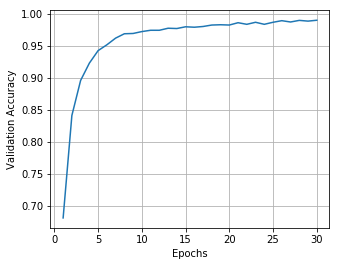

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=1, figsize=(5, 4))
ax.plot(range(1, EPOCHS + 1), valid_accuracy_sets)
ax.set_xlabel('Epochs')
ax.set_ylabel('Validation Accuracy')
ax.grid(True)
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import glob
import matplotlib.image as mpimg


webImagesDir = 'WebImages'
imageNames = glob.glob('WebImages/*.jpg')
webImages = np.array([ mpimg.imread('./' + imgName ) for imgName in imageNames ])

fig, axes = plt.subplots(ncols=len(webImages), figsize=(16, 8))
for ax, image, imageName in zip(axes, webImages, imageNames):
    ax.imshow(image)
    #ax.set_title(imageName)
plt.show()

### Predict the Sign Type for Each Image

In [ ]:
import tensorflow as tf

X_web = dataPreprocess(webImages,"Web Images")

In [ ]:
sess = tf.Session()

modelPath = 'models/trafficSign'
modelGraphFile = modelPath + '.meta'

saver = tf.train.import_meta_graph(modelGraphFile)
saver.restore(sess,tf.train.latest_checkpoint('./models/'))

graph = tf.get_default_graph()
x = graph.get_tensor_by_name("x:0")
y = graph.get_tensor_by_name("y:0")
keep1 = graph.get_tensor_by_name("keep1:0")
keep2 = graph.get_tensor_by_name("keep2:0")
keep3 = graph.get_tensor_by_name("keep3:0")
keep4 = graph.get_tensor_by_name("keep4:0")
logits = graph.get_tensor_by_name("logits:0")
one_hot_y = tf.one_hot(y,43)

web_softmax = sess.run(tf.nn.softmax(logits), feed_dict={x: X_web, keep1:1.0,
                                                             keep2:1.0, keep3:1.0, keep4:1.0})

predicts = sess.run(tf.nn.top_k(web_softmax, k=5, sorted=True))

incorrect_op = tf.not_equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
y_v = np.array([28,25,27,30,25,22,28])
incorrect = sess.run(incorrect_op, feed_dict={x: X_web, y: y_v, keep1: 1.0,
                                                keep2: 1.0, keep3: 1.0, keep4: 1.0})
incorrect_images = X_web[incorrect]

In [34]:
import matplotlib.pyplot as plt
for i in range(len(predicts[0])):
    print('Image: ' + imageNames[i])
    print('Top 5 Probabilities:')
    for j in range(0, len(predicts[0][i])):
        prob = predicts[0][i][j]
        index = predicts[1][i][j]
        name = signNames[index]
        print('   {:.5f} : {} - {}'.format(prob, index, name))
    print()

Image: WebImages/s3-Pedestrians.jpg
Top 5 Probabilities:
   0.99994 : 27 - Pedestrians
   0.00006 : 11 - Right-of-way at the next intersection
   0.00000 : 26 - Traffic signals
   0.00000 : 28 - Children crossing
   0.00000 : 24 - Road narrows on the right

Image: WebImages/s5-roadwork.jpg
Top 5 Probabilities:
   0.90581 : 25 - Road work
   0.03549 : 27 - Pedestrians
   0.02457 : 28 - Children crossing
   0.02323 : 29 - Bicycles crossing
   0.00308 : 12 - Priority road

Image: WebImages/s7-child.jpg
Top 5 Probabilities:
   0.47204 : 27 - Pedestrians
   0.44954 : 28 - Children crossing
   0.01912 : 11 - Right-of-way at the next intersection
   0.01721 : 30 - Beware of ice/snow
   0.01591 : 24 - Road narrows on the right

Image: WebImages/s4-ice.jpg
Top 5 Probabilities:
   0.69506 : 23 - Slippery road
   0.29490 : 30 - Beware of ice/snow
   0.00799 : 28 - Children crossing
   0.00186 : 29 - Bicycles crossing
   0.00012 : 25 - Road work

Image: WebImages/s6-bumpy.jpg
Top 5 Probabilities:


In [ ]:
def plotOutput(classes, names):
    """
    Plot the network output
    """
    nCols = len(classes)
    assert(nCols == len(names))
    
    fig, axes = plt.subplots(ncols=nCols, figsize=(4*nCols, 4))
    for ax, aClass, title in zip(axes, classes, names):        
        ax.bar(range(0,43), aClass)
        ax.set_xlabel('Hist')
        ax.set_ylabel('Count')
        ax.set_title(title)
        ax.grid(True)
        
    fig.tight_layout()
    plt.show()

plotOutput(web_softmax, imageNames)

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=len(webImages), figsize=(16, 8))
for ax, image, imageName, predictedName in zip(axes, webImages, imageNames, namedPredictions):
    index = predicts[1][1]
    ax.imshow(image)
    ax.set_title('{}'.format(predictedName))

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")